In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 22s 2us/step


In [7]:
import matplotlib.pyplot as plt

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

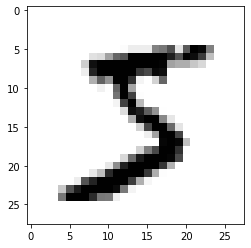

In [8]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [9]:
y_train[0]

5

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [11]:
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

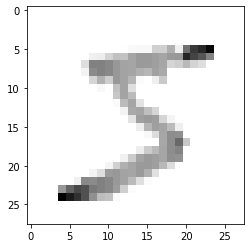

In [13]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [14]:
#Let's build a sequential keras model.

model = tf.keras.models.Sequential()

* A sequential model is what we are going to use most of the time. It just means things are going to go in direct order. A feed forward model.
* we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that.

In [16]:
model.add(tf.keras.layers.Flatten())

* Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.

In [18]:
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

* relu is rectified linear activation function: The rectified linear activation function is a piecewise linear function that will output the input directly if is positive, otherwise, it will output zero

In [19]:
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

* This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. Great, our model is done.

![](softmax_activation_function.png)

In [21]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

* Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

In [22]:
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.9135
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9592
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0976 - accuracy: 0.9707


* Epoch is just a "full pass" through your entire training dataset. So if you just train on 1 epoch, then the neural network saw each unique sample once. 3 epochs means it passed over your data set 3 times.

In [23]:
model.save('epic_num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [24]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [26]:
predictions = new_model.predict(x_test)

In [27]:
import numpy as np

print(np.argmax(predictions[0]))

7


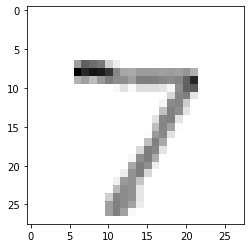

In [28]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [29]:
#AWESOME!